# Lab 2 : EM Algorithm, DB Scan, and Kmeans

---


Total Points: **45**

Tentative Weightage : **10%**

Submission Deadline :  **$31^{st}$ October 2021 , 23:59 hours**

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a text block) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. You can use any programming language of your choice. In case you prefer any other language than python then you can submit all the code and related files along with detailed pdf report in a zip format on the classroom. In such cases  suitable input format for each of the question and a readme file should precisely tell how to compile and run your program. Give the exact commands with respect to the datasets provided. 
11. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
12. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
13. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


### 1. Adult Dataset

#### About the Dataset
The data set contains information of 32562 individuals from the 1994
census, of which 21790 are males and 10771 are females. We choose six attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week, sex. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult) 



### 2. Spiral Dataset

#### About the Dataset
The dataset is synthetically generated contains 5000 datapoints. Each datapoint contains a feature vector of size three denoting x,y coordinate in 2D plane and the last feature denoting the binary class. 



---

**NOTE**: Please use the provided dataset files along with this notebook. The adult dataset is scaled and normalised version of complete dataset available at UCI repository. 

---

In [2]:
# Perform the necessary imports here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [ ]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

# from google.colab import drive
# drive.mount('/content/MyDrive', force_remount = True)

**TASK 1**:                                                      **(5 Marks)**

1. Download and load the dataset files into pandas dataframe. You can refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). (**1 point**) 
2. Report the total number of samples and the total number of columns in the dataset. (**1 point**)
3. Evaluate the dataset and drop data which hash 'NA' values. Now report the total number of samples and the total number of columns in the dataset. (**1 point**)
4. Plot a bar chart showing the number of samples present for different class. In Adult dataset consider 'sex' to be class labels and in Spiral dataset consider the last binary feature to be class label. (**1 point**)
5. Plot the spiral dataset using matplotlib to check if the datset is spiral or not. Use only first two columns denoting x,y coordinates in 2D plane. (**1 point**)

In [3]:
# Load the data from csv file into a data frame (1 point)

# read spiral dataset
dfsp = pd.read_csv('spiral.csv')
dfsp.sample(5)
# dfsp.describe()

# read adult dataset
dfad = pd.read_csv('adult.csv')
dfad.sample(5)
# dfad.describe()

,age,fnlwgt,education_num,capital_gain,hours_per_week,gender
26854,-0.258638,0.936072,-0.007782,-0.225159,-0.078216,0
22710,-0.279398,0.759026,-0.372482,0.451336,-0.058039,0
16664,-0.557605,-0.023267,0.823971,-0.020595,-0.095828,0
22095,-0.411413,0.654640,0.048200,0.629466,-0.060293,1
28253,-0.397811,-0.025357,-0.860124,-0.300639,-0.104436,0


In [4]:
# Print the number of instances and attributes in the loaded data frame (1 point)
data1 = dfsp.to_numpy()
print("In Spiral dataset -->")
print("Total Samples : ",data1.shape[0])
print("Total Columns : ",data1.shape[1])

data2 = dfad.to_numpy()
print("In Adult dataset -->")
print("Total Samples : ",data2.shape[0])
print("Total Columns : ",data2.shape[1])

In Spiral dataset -->
Total Samples :  5000
Total Columns :  3
In Adult dataset -->
Total Samples :  32561
Total Columns :  6


In [5]:
# Drop the rows with NaN values (0.5 points)
dfad = dfad.dropna()
dfsp = dfsp.dropna()

In [6]:
# Print the number of instances and attributes in the loaded data frame after removal of NaN columns (0.5 points)
data1 = dfsp.to_numpy()
print("In Spiral dataset -->")
print("Total Samples : ",data1.shape[0])
print("Total Columns : ",data1.shape[1])

data2 = dfad.to_numpy()
print("In Adult dataset -->")
print("Total Samples : ",data2.shape[0])
print("Total Columns : ",data2.shape[1])

In Spiral dataset -->
Total Samples :  5000
Total Columns :  3
In Adult dataset -->
Total Samples :  32561
Total Columns :  6


<AxesSubplot:xlabel='ADULT DATASET : GENDER --->'>

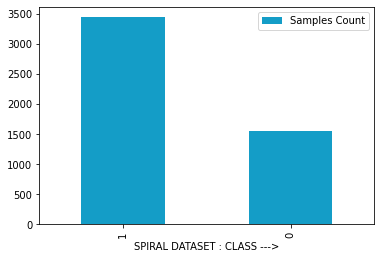

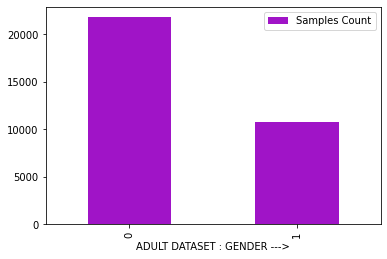

In [39]:
# Plot a bar chart showing the number of samples for different classes in both dataset (1 point)
# dfsp['class'].value_counts()
dfsp['class'].value_counts().rename_axis('SPIRAL DATASET : CLASS --->').rename('Samples Count').to_frame().plot(kind='bar', color='#149dc7')
dfad['gender'].value_counts().rename_axis('ADULT DATASET : GENDER --->').rename('Samples Count').to_frame().plot(kind='bar', color='#a014c7')

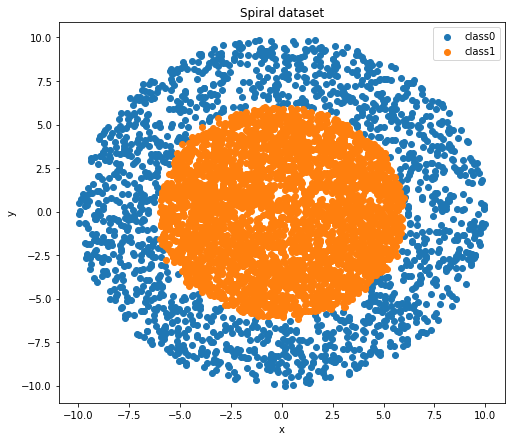

In [40]:
# Plot a scatter plot for spiral dataset (1 point)
data = data1
Class = data[:,2]
Class = Class.astype(int)
plt.figure(figsize=(8, 7))
plt.scatter(data[:,0][Class==0],data[:,1][Class==0])
plt.scatter(data[:,0][Class==1],data[:,1][Class==1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spiral dataset')
plt.legend(['class0','class1'])
plt.show()

### Comments on Task 1

---
- Adult dataset has more samples compared to spiral dataset.
- As spiral dataset has large number of data points, above plot doesn't look like spiral. Plot is kind of 2-elliptical (inner and outer)

---
**End of Task 1**


---



**TASK 2: DBSCAN**  
                                                     **(6+2+2=10 Marks)**
1. Implement the clustering algorithm DBSCAN on both the datasets. 
2. Compare the two datasets in terms of sum of the squared error and time taken on both datasets. 
3. Plot the obtained clusters for number of cluster ($k$=2).
3. Compare the performance of algorithm on the given datasets with different $k$ values and prepare a detailed observation in the suitable comment box.
4. Which value of K that is best suited based on the sum of squared error metric. Write your general observation and reason for the same. [The answer will be evaluated based on your observations and not any fixed pre-defined value]

**NOTE:<br> 1. Take different $k$ values as 2,5,10,20 and report your obervation.<br> 2. Dont include the sex feature and class label feature in adult and spiral dataset respectively for this task. Thus use 5 features in adult and 2 features in spiral dataset.**

UPDATES TASK 2
1. Implement the clustering algorithm DBSCAN on both the datasets.
2. Compare the two datasets in terms of sum of the squared error and time taken on both datasets.
3. Take any suitable value for hyper-parameters eplison and min. points and plot the obtained clusters.
4. Compare the performance of algorithm on the given datasets with different epilson values (fixing min.
points) and prepare a detailed observation in the suitable comment box. Now fix the min points and vary
the epilson and report your observation related to number of clusters formed.
5. Which value of epilson and min points do you think is best suited based on the sum of squared error
metric. Write your general observation and reason for the same. [The answer will be evaluated based on
your observations and not any fixed pre-defined value]

**NOTE:<br> 1. Dont include the sex and class label attribute in adult and spiral dataset respectively for this task. Thus
use 5 features in adult and 2 features in spiral dataset.**


### Implementation of Task 2 on each dataset
##### **(3+3=6 Marks)**

In [ ]:
#Implement the DBSCAN on both datasets   6 points                      
# Please insert your code here



### Plot for Task 2 on both datasets
##### **(1+1=2 Marks)**

In [ ]:
#Plot for k=2 clusters obtained clusters on both dataset   2 points                      
# Please insert your code here



### Comments on Task 2          
##### **(2 Marks)**

---

Please enter your comments here

---
**End of Task 2**


---



**TASK 3: EM Algorithm**  
                                                     **(6+2+2=10 Marks)**
1. Implement the EM algorithm with the assumption of Gaussian Mixture model.
2. Take $k$=2 for spiral and $k$=10 for adult dataset.
3. Plot the estimated density functions from your algorithm against the data points generated for both datasets. 
4. Explain the plot in the comment section box for task for both datasets.


### Implementation of Task 3 on each dataset
##### **(3+3=6 Marks)**

In [ ]:
#Implement the EM Algorithm on both datasets   6 points                      
# Please insert your code here




In [ ]:
#Plot for respective k value of both dataset   2 points                      
# Please insert your code here



### Comments on Task 3          
##### **(2 Marks)**

---

Please enter your comments here

---
**End of Task 3**


---



## A) **$k$-means Clustering**

$k$-means is very well studied problem in the domain of unsupervised machine learning. It is also sometimes called Vanilla $k$-means or standard $k$-means algorithm. The goal of algorithm is to select $k$ centers and obtain the partioning of the dataset X such that the datapoints are nearest to each center they are assigned. The objective cost of the final clustering obtained is given by 
$$L_p(X, C, \phi) = \left(\sum_{x \in  X }\sum_{j \in [k] } \mathbb{I}(\phi(x) =j)d(x,c_j)^2\right)^\frac{1}{2}
 $$ where $\mathcal{C} = \{C_1, C_2, \ldots, C_k\}$ denotes clusters with centers $C = \{c_j\}_{j=1}^{k}$, $d(.)$ is euclidean distance metric , $\phi$ is cluster assignment and $\mathbb{I}$ is indicator function which helps in checking if datapoint $x$ belongs to $j^{th}$ cluster.<br>
 

It is basically the squared sum of euclidean distance between each point and assigned center. For further details refer **Lecture Notes**

## B)  **Fair $k$-means Clustering**
Machine Learning is being studied in both supervised and unsupervised settings. The decision taken by these algorithms have societal impact on the humans. So if any such decision is biased towards a particular type of people it will lead to catastropic effects on the life of affected individuals. Many such reallife scenarios like automated resume processing of amazon, and US criminal risk prediction etc. have been found to biased towards certain groups of socities like females, or individuals belonging to certain race (black). Thus there is need of fair machine learning algorithms.<br>
In **Supervised** setting, fairness is very well studied problem. In unsupervised setting many new algorithms are coming up to deal with fairness issues and reduce the biasness. <br>
In **Unsupervised** settings like $k$-means clustering the fairness is being studied in two aspects namely:<br><br>
1.**Group Fairness Notion** - deals with the fairness in terms of complete group of points in the cluster. It tries to maintain the ratio of every type of individual within each cluster. eg. If we have 100 datapoints (70 Males + 30 Females) to train upon. Then group fairness tries to capture this ratio within each formed cluster. In simple words,it tries to maintain the ratio of males:females in each cluster to be 70:30 ie 7:3 . <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To achieve this each center might have to loose some of good points that are intially close to it so as to maintain the ratio. Thus there will be increase in objective cost as compared to vanilla $k$-means clustering.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to check whether the obtained clusters are fair or not what one can do is to calculate the value of fairness metric known as **Balance** which can be computed using the given formula:

$$Balance(X,C,\phi) = \min_{j \in \mathcal{C}}\left( 
 \min\left( \frac{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=a)}}{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=b)}}, \frac{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=b)}}{\sum_{x \in X:\phi(x)=j}\mathbb{I}{(\rho_i=a)}} \right)
\right)$$ where $\rho_i$ is the protected attribute of $i^{th}$ data instance and $\rho_i$ can take value $a$ or $b$ in case of binary valued attribute.<br>
<br>
The formula mainly tells us that we need to find the minimum of (a/b , b/a) for each cluster then among these obtained minimas we will report the overall minimum as the balance for complete clustering set obtained.<br><br>
**Takeaway for assignment:** *In our case a and b are two possible values of protected group like male and female.* <br>
*In your assignment so basically you need to find the ratio of male/female or female/male for each cluster, store these in some array and then find the minimum of this array. This final minimum will be the balance. In dataset you can assume male being denoted by 1 and female being denoted by 0*<br><br>

2.**Individual Fairness Notion** -  deals with the fairness with regards to each individual in the space. On similar grounds as balance, one can check the individual fairness in obtained clustering using the metric given by :

$$MaxD(X,C,\phi) = \min_{j \in \mathcal{C}}\left( 
 \min\left( \frac{\max_{x \in X:\phi(x)=j,\ \rho_i=a} d(x,c_j)}{\max_{x \in X:\phi(x)=j,\ \rho_i=b} d(x,c_j)}, \frac{\max_{x \in X:\phi(x)=j,\ \rho_i=b} d(x,c_j)}{\max_{x \in X:\phi(x)=j,\ \rho_i=a} d(x,c_j)} \right)
\right)$$
<br><br>
It basically tries to find the minimum of ( Farthest_male_point_distance /Farthest_female_point_distance ) in each cluster ans then overall metric is minima of these obtained values over k cluster. 

**Takeaway for assignment:**<br> *In your assignment so basically you need to find the minimum of $p=\frac{(farthest\ distance\ of\ male\ point\ in\ cluster)}{(farthest\ distance\ of\ female\ point\ in\ cluster)}$ or $p^{-1}$  for each cluster, store these in some array and then find the minimum of these obtained k sized array. This final minimum will be the maxD.*<br><br>




**TASK 4: Fair $k$-means Clustering**  
                                                     **(19 Marks)**<br><br>
**NOTE:** This task is to be done only on **Adult** dataset.
1. Implement the $k$-means clustering algorithm.
2. While performing $k$-means clustering on adult dataset use only five attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week. 
3. Use the attribute sex as protected (sensitive) attribute for fairness.
4. Calculate the objective cost for different k values. 
4. Calculate the fairness metrics ie. balance and MaxD for set of clusters obtained against different $k$ values. To be more precise, store the value of both metric in a array for different $k$ values. Print these value array obtained
5. Plot the variation of objective cost, balance and maxD over different $k$ values.
6. Comment your observation. Also tell your observation which fairness notion is more beneficial and should be focused upon? Can you think of some other notion of fairness in clustering?


**NOTE: Take different $k$ values as 2,5,10,20 to report your obervation.**

In [ ]:
#Implement the kmeans algorithm        10 points 
# Please insert your code here



#Calculate the fairness metrics and print       5 points for calculation of all three metrics and  1 point for printing
# Please insert your code





## Plot the variation over different k values     3 points 
# Please insert your code


### Comments on Task 4          
##### **( Marks)**

---

Please enter your comments here

---
**End of Task 4**


---



**TASK 5: Observation**
**(0.5 + 0.5 =1 Marks)**   
 
#### Which out of $k$-means and DBSCAN algorithm do you think is best suited for the given datasets ?

---
**End of Task 5**


---

